# *Comparing Regression models with binding free energy calculations data*

### In this NoteBook, the statistical analysis will be performed around data from binding free energy (deltaG) collected for different molecular targets interacting with several bioactive compounds. The deltaG values from the experiment and two computational methods (FEP and TI) are compared, using regression analysis, and grouped according to molecular target.

In [2]:
pip install pandas matplotlib seaborn numpy scipy scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from scipy.stats import norm, pearsonr
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from collections import namedtuple
from math import sqrt
import warnings

In [4]:
csv_name = "updated_data2.csv"
df_dict = pd.read_csv(csv_name, header=None)

In [5]:
def get_data_from_sheet(df_dict, sheet_name, col_names):
    df = df_dict[sheet_name]
    df = df[df.columns[12:13]]
    col_names = ["Exp. dG","Pred. dG"]
    df.columns = col_names
    df = df.dropna()
    #df = df.query("Experimental_dG > -20")
    #rows,_ = df.shape
    #df.insert(0,"Target",[sheet_name]*rows)
    #df.insert(1,"ID",[f"{sheet_name}_{x}" for x in range(0,rows)])
    return df

In [6]:
pd.options.display.float_format = '{:,.2f}'.format

In [7]:
df_dict.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,SMILES,ID,MolWt,LogP,HBD,HBA,RotatableBonds,TPSA,Volume,LipinskiViolations,NumAtoms,Exp. dG,Pred. dG
1,CN1C(=[NH+][C@@](c2cccc(c3cccc(Cl)c3)c2)(C2CCC...,CAT-13f,368.89,2.26,2,2,3,60.3,221.78,0,26,"-9,09","-10,24"
2,CN1C(=[NH+][C@@](c2cccc(c3cccc(Cl)c3)c2)(C2CC2...,CAT-13d,340.83,1.48,2,2,3,60.3,204.89,0,24,"-10,47","-10,5"
3,COc1ccc(c2cccc([C@@]3(c4ccccc4)[NH+]=C(N)N(C)C...,CAT-4c,372.45,1.47,2,3,4,69.53,224.2,0,28,"-7,85","-7,52"
4,CC[C@]1(c2cccc(c3cccc(Cl)c3)c2)[NH+]=C(N)N(C)C1=O,CAT-13b,328.82,1.48,2,2,3,60.3,197.66,0,23,"-9,12","-8,92"


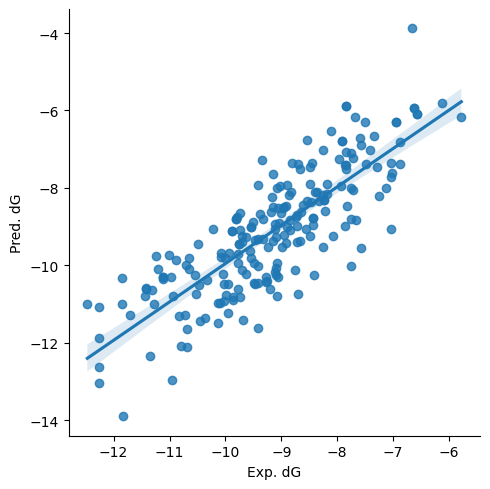

In [76]:
import pandas as pd

# Load the CSV
df = pd.read_csv('updated_data2.csv')

# Strip column names (just in case)
df.columns = df.columns.str.strip()

# Replace commas with dots in a specific column, e.g., 'Pred. dG'
df['Pred. dG'] = df['Pred. dG'].astype(str).str.replace(',', '.')
df['Pred. dG'] = pd.to_numeric(df['Pred. dG'], errors='coerce')  # convert to float
df['Exp. dG'] = df['Exp. dG'].astype(str).str.replace(',', '.')
df['Exp. dG'] = pd.to_numeric(df['Exp. dG'], errors='coerce')  # convert to float

# Save back to CSV
df.to_csv('updated_data3.csv', index=False)

con = pd.read_csv('updated_data3.csv')
con
sns.lmplot(x="Exp. dG", y="Pred. dG", data=con);

In [77]:
# Strip column names (just in case)
df.columns = df.columns.str.strip()

# Extract the columns you need
con = df['Exp. dG']
con1 = df['Pred. dG']

# Calculate statistics
mean = con.mean()
mean2 = con1.mean()  
median = con.median()
median2 = con1.median()
variance = con.var()
variance2 = con1.var()
std_dev = con.std()
std_dev2 = con1.std()
min_value = con.min()
min_value2 = con1.min()
max_value = con.max()
max_value2 = con1.max()

# Print the statistics
print('Mean: ', format(mean, ',.2f'))
print('Median: ', format(median, ',.2f'))
print('Variance: ',format(variance, ',.2f'))
print('Standard Deviation: ', format(std_dev, ',.2f'))
print('Min: ', format(min_value, ',.2f'))
print('Max: ', format(max_value, ',.2f'))

# Print the statistics
print('Mean: ', format(mean2, ',.2f'))
print('Median: ', format(median2, ',.2f'))
print('Variance: ',format(variance2, ',.2f'))
print('Standard Deviation: ', format(std_dev2, ',.2f'))
print('Min: ', format(min_value2, ',.2f'))
print('Max: ', format(max_value2, ',.2f'))

Mean:  -9.16
Median:  -9.11
Variance:  1.78
Standard Deviation:  1.33
Min:  -12.47
Max:  -5.78
Mean:  -9.12
Median:  -9.11
Variance:  2.60
Standard Deviation:  1.61
Min:  -13.90
Max:  -3.88


### In this part of the NoteBook, the calculation of Variance and Covariance is reported. The whole data set, as well as some selected molecular targets, will be used to calculate variance.

## *Variance*
### It is the sum of squared deviations from the mean divided by n – 1, where n is the number of data values.
### Therefore, the first statistical quantity to obtain is the mean for all FEP and TI energies and some selected molecular targets.
### Variance can be calculated using the following formula: 

$$
 s^2 = SUM(x- u)^2 / n - 1
$$


In [78]:
# Strip column names (just in case)
df.columns = df.columns.str.strip()

df.head()

,SMILES,ID,MolWt,LogP,HBD,HBA,RotatableBonds,TPSA,Volume,LipinskiViolations,NumAtoms,Exp. dG,Pred. dG
0,CN1C(=[NH+][C@@](c2cccc(c3cccc(Cl)c3)c2)(C2CCC...,CAT-13f,368.89,2.26,2,2,3,60.30,221.78,0,26,-9.09,-10.24
1,CN1C(=[NH+][C@@](c2cccc(c3cccc(Cl)c3)c2)(C2CC2...,CAT-13d,340.83,1.48,2,2,3,60.30,204.89,0,24,-10.47,-10.50
2,COc1ccc(c2cccc([C@@]3(c4ccccc4)[NH+]=C(N)N(C)C...,CAT-4c,372.45,1.47,2,3,4,69.53,224.20,0,28,-7.85,-7.52
3,CC[C@]1(c2cccc(c3cccc(Cl)c3)c2)[NH+]=C(N)N(C)C1=O,CAT-13b,328.82,1.48,2,2,3,60.30,197.66,0,23,-9.12,-8.92
4,CN1C(=[NH+][C@](c2ccccc2)(c2cccc(c3cnccn3)c2)C...,CAT-4l,344.40,0.25,2,4,3,86.08,207.32,0,26,-9.34,-7.29


In [79]:
whole_data_fep = df['Pred. dG'] # Extract the FEP_dG column
whole_data_exp = df['Exp. dG'] # Extract the Exp_dG column


mean_fep_all = whole_data_fep.mean() # Calculate the mean of the FEP_dG column
mean_exp_all = whole_data_exp.mean() # Calculate the mean of the Exp_dG column


print('Mean FEP all: ', format(mean_fep_all, ',.2f')) # Print the mean of the FEP_dG column
print('Mean Exp all: ', format(mean_exp_all, ',.2f')) # Print the mean of the Exp_dG column

Mean FEP all:  -9.12
Mean Exp all:  -9.16


In [80]:
sum_squared_diff = 0
count = 0

for num in whole_data_fep:
    sum_squared_diff += (num - mean_fep_all)**2
    count += 1

variance = sum_squared_diff / (count - 1)
    
print('squared_deviations_FEP: ', format(sum_squared_diff, ',.2f'))
print('Variance for FEP in all data: ', format(variance, ',.2f'))


squared_deviations_FEP:  546.11
Variance for FEP in all data:  2.60


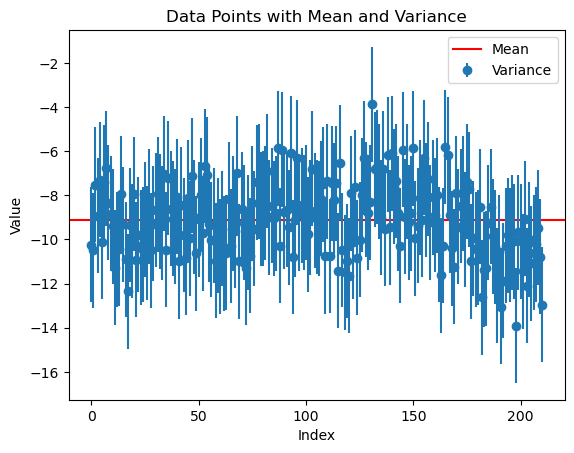

In [81]:
# Plot the mean
plt.axhline(y=mean_fep_all, color='r', linestyle='-', label='Mean')

# Plot the variance as error bars
plt.errorbar(range(len(whole_data_fep)), whole_data_fep, yerr=variance, fmt='o', label='Variance')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Data Points with Mean and Variance')
plt.legend()

# Show the plot
plt.show()

In [82]:
sum_squared_diff = 0
count = 0

for num in whole_data_exp:
    sum_squared_diff += (num - mean_exp_all)**2
    count += 1

variance = sum_squared_diff / (count - 1)
    
print('squared_deviations_TI: ', format(sum_squared_diff, ',.2f'))
print('Variance for TI in all data: ', format(variance, ',.2f'))

squared_deviations_TI:  373.15
Variance for TI in all data:  1.78


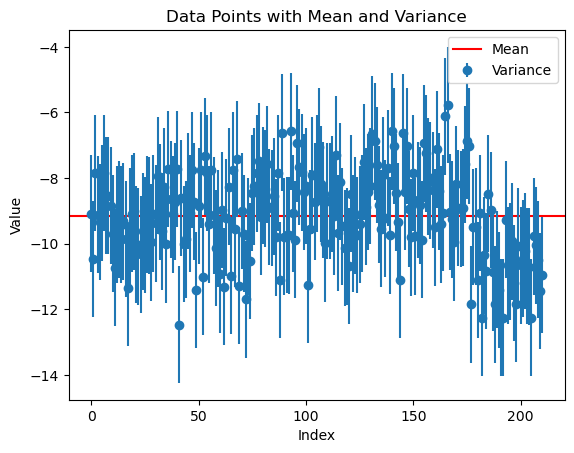

In [83]:
# Plot the mean
plt.axhline(y=mean_exp_all, color='r', linestyle='-', label='Mean')

# Plot the variance as error bars
plt.errorbar(range(len(whole_data_exp)), whole_data_exp, yerr=variance, fmt='o', label='Variance')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Data Points with Mean and Variance')
plt.legend()

# Show the plot
plt.show()

### The covariance measures the relationship between two variables x and z. Denote the mean for each variable by X and Z.
### As with the correlation coefficient, positive values indicate a positive relationship and negative values indicate a negative relationship.
### Covariance can be calculated using the following formula: 

$$
Sx,z = SUM (x - X)*(z - Z) / n - 1
$$
### Correlation, however, is constrained to be between –1 and 1, whereas covariance is on the same scale as the variables X and Z.


In [84]:
sum_of_diff = 0
count = 0

# Ensure both lists have the same length
if len(whole_data_fep) != len(whole_data_exp):
    raise ValueError("The lists whole_data_fep and whole_data_exp must have the same length")

# Calculate the sum of the product of differences from the mean
for num, num2 in zip(whole_data_fep, whole_data_exp):
    diff_fep = (num - mean_fep_all)
    diff_exp = (num2 - mean_exp_all)
    sum_of_diff += diff_fep * diff_exp
    count += 1

# Calculate the covariance
covariance = sum_of_diff / (count - 1)
    
#print(sum_of_diff)
print('Covariance for FEP in all data: ', format(covariance, ',.2f'))

Covariance for FEP in all data:  1.76


# From this part on, the dataset is prepared to apply the Gaussian Naive-Bayer classifier.

In [95]:
# Strip column names (just in case)
df.columns = df.columns.str.strip()

# Converts the bioactivity data to binary classification labels
labels = [1 if bioactivity <= -7.0 else 0 for bioactivity in df['Exp. dG']]

df.head()

,MolWt,LogP,HBD,HBA,RotatableBonds,TPSA,Volume,LipinskiViolations,NumAtoms,Exp. dG
0,368.89,2.26,2,2,3,60.30,221.78,0,26,-9.09
1,340.83,1.48,2,2,3,60.30,204.89,0,24,-10.47
2,372.45,1.47,2,3,4,69.53,224.20,0,28,-7.85
3,328.82,1.48,2,2,3,60.30,197.66,0,23,-9.12
4,344.40,0.25,2,4,3,86.08,207.32,0,26,-9.34


In [ ]:
#df.drop('SMILES', axis=1, inplace=True)
#df.drop('ID', axis=1, inplace=True)
#df.drop('Pred. dG', axis=1, inplace=True)

#df.to_csv("full-processed.csv", index=False)
# Let's see what's in the Bank-full data - Jupyter notebooks print the result of the last thing you do
#df = pd.read_csv("full-processed.csv")  

#df.head()

,MolWt,LogP,HBD,HBA,RotatableBonds,TPSA,Volume,LipinskiViolations,NumAtoms,Exp. dG
0,368.89,2.26,2,2,3,60.30,221.78,0,26,-9.09
1,340.83,1.48,2,2,3,60.30,204.89,0,24,-10.47
2,372.45,1.47,2,3,4,69.53,224.20,0,28,-7.85
3,328.82,1.48,2,2,3,60.30,197.66,0,23,-9.12
4,344.40,0.25,2,4,3,86.08,207.32,0,26,-9.34


In [96]:
# Now we will check for missing values in the dataset
names = [] # list to store column names
values = [] # list to store number of missing values
def check_missing(df):
    if df.isnull().values.any() :
        print("There is missing in data")
        return True
    else:
        print("Data has no missing values")
        return False

if(check_missing(df)):
    for col_name in df.columns:
        if df[col_name].isnull().any() :
            #print(col_name + " column has "+str(df[col_name].isnull().sum())+" missing values")
            names.append(col_name)
            values.append(df[col_name].isnull().sum())
            
    missing = {"column":names,
              "# of missings":values}
    missingDf = pd.DataFrame(missing)
    print(missingDf)
    missingDf.plot.bar(x="column",y='# of missings', figsize=(6, 6),ylabel="# of missing",xlabel = "Column",color="red")


Data has no missing values


In [97]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [98]:
# We will split the dataset into training and testing sets 
X = df.drop("Exp. dG", axis=1)
y = labels

df.head()

,MolWt,LogP,HBD,HBA,RotatableBonds,TPSA,Volume,LipinskiViolations,NumAtoms,Exp. dG
0,368.89,2.26,2,2,3,60.30,221.78,0,26,-9.09
1,340.83,1.48,2,2,3,60.30,204.89,0,24,-10.47
2,372.45,1.47,2,3,4,69.53,224.20,0,28,-7.85
3,328.82,1.48,2,2,3,60.30,197.66,0,23,-9.12
4,344.40,0.25,2,4,3,86.08,207.32,0,26,-9.34


In [106]:
# Encoding the outcome column to get numerical class
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [107]:
# Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier on the training data
gnb.fit(X_train, y_train)


GaussianNB()

In [108]:
# import performance metric libraries 
from sklearn.metrics import (
accuracy_score, 
confusion_matrix, 
ConfusionMatrixDisplay, 
f1_score, 
classification_report
)

In [109]:
# Make predictions on the testing data
y_pred = gnb.predict(X_test)

# measure the performance
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted") 
print("The accuracy of my Naive Bayes Model is:", accuracy) 
print("The F1 Score of my Naive Bayes Model is:", f1)

The accuracy of my Naive Bayes Model is: 0.788235294117647
The F1 Score of my Naive Bayes Model is: 0.7240000000000001


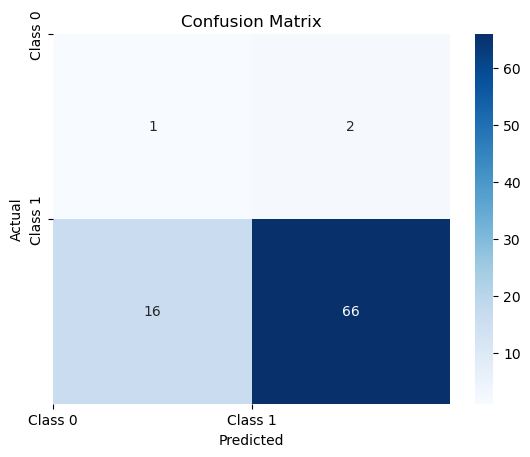

In [110]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a list of class labels
class_labels = ['Class 0', 'Class 1']

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Add labels, title, and ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(class_labels)), class_labels)
plt.yticks(np.arange(len(class_labels)), class_labels)

# Show the plot
plt.show()

In [111]:
# Makes predictions on the testing set
y_pred = gnb.predict(X_test)

# Prints the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.06      0.33      0.10         3
           1       0.97      0.80      0.88        82

    accuracy                           0.79        85
   macro avg       0.51      0.57      0.49        85
weighted avg       0.94      0.79      0.85        85

